In [8]:
from analyze_utils import *

path = "/home/stud03/DanielH/llm_outputs/rationales/cqa-train"
df = read_sharded_dataset(path)

df.loc[:,["question", "choices", "answer", "few_shot_positive_rationale", "few_shot_negative_rationale"]].head(5)

,question,choices,answer,few_shot_positive_rationale,few_shot_negative_rationale
0,"""There are 10 apples on an apple tree. Three fall off. Now there are X apples."" What is this an example of?","[park, coloring book, garden center, math problem, gravity]",math problem,"This type of problem is typically used in arithmetic or algebra to practice simple subtraction. The initial statement sets up a simple equation, in which three apples fall off, leaving the remaining apples, which can be solved by subtracting three from ten.","It's a math problem because now that the apples fell off, 7 plus 3 is 10!"
1,"A John is a bum. Much like the stereotype, he lives near this sort of transportation infrastructure. Where does he live?","[bus depot, beach, train station, bridge, bridge]",bridge,Bums or homeless people often seek shelter under bridges or in similar areas due to the lack of access to permanent housing or shelter. This aligns with the negative stereotype that many bums or homeless people are often viewed as living under bridges or on the streets.,Why? Because that's where you go when you want to catch a bus that will take you to the beach.
2,"A bad person places little value on being honest, acting without pretense or being what?","[excellent, upright, premium, competent, sincere]",sincere,A person who acts without pretense or acting in a way that is true to their authentic self is considered sincere. This choice aligns with the definition of being upright as acting with integrity and morality.,"You know, a sincere bad person would never act without pretense because, you know, sincere bad people are known for their excellent upright competence while being premium without pretense and acting sincere."
3,"A bald eagle flies over St. Paul, where is it?","[texas, thermal, minnesota, canada, photograph]",minnesota,"Bald eagles can be found throughout North America, and Minnesota is a state with a significant bald eagle population. The bald eagle is the national bird of the United States and is commonly found in areas with large bodies of water, such as lakes and rivers.","If I could only fly like a bald eagle over a St. Paul, you know, it would be much easier for me to make an accurate guess on what country I'd be in."
4,"A battleship is a powerful vessel. If you need something similar but faster, what would you use?","[yatch, corvette, aircraft carrier, destroyer, patrol boat]",corvette,"A corvette is a small, fast naval warship, typically used for patrol, escort, and convoy duties, similar to a battleship, but smaller and more maneuverable.","It has the same definition as battleship, but it's a bit faster. I don't think I need to explain further, because the question speaks for itself."


Loading the tokenizer from the `special_tokens_map.json` and the `added_tokens.json` will be removed in `transformers 5`,  it is kept for forward compatibility, but it is recommended to update your `tokenizer_config.json` by uploading it again. You will see the new `added_tokens_decoder` attribute that will store the relevant information.


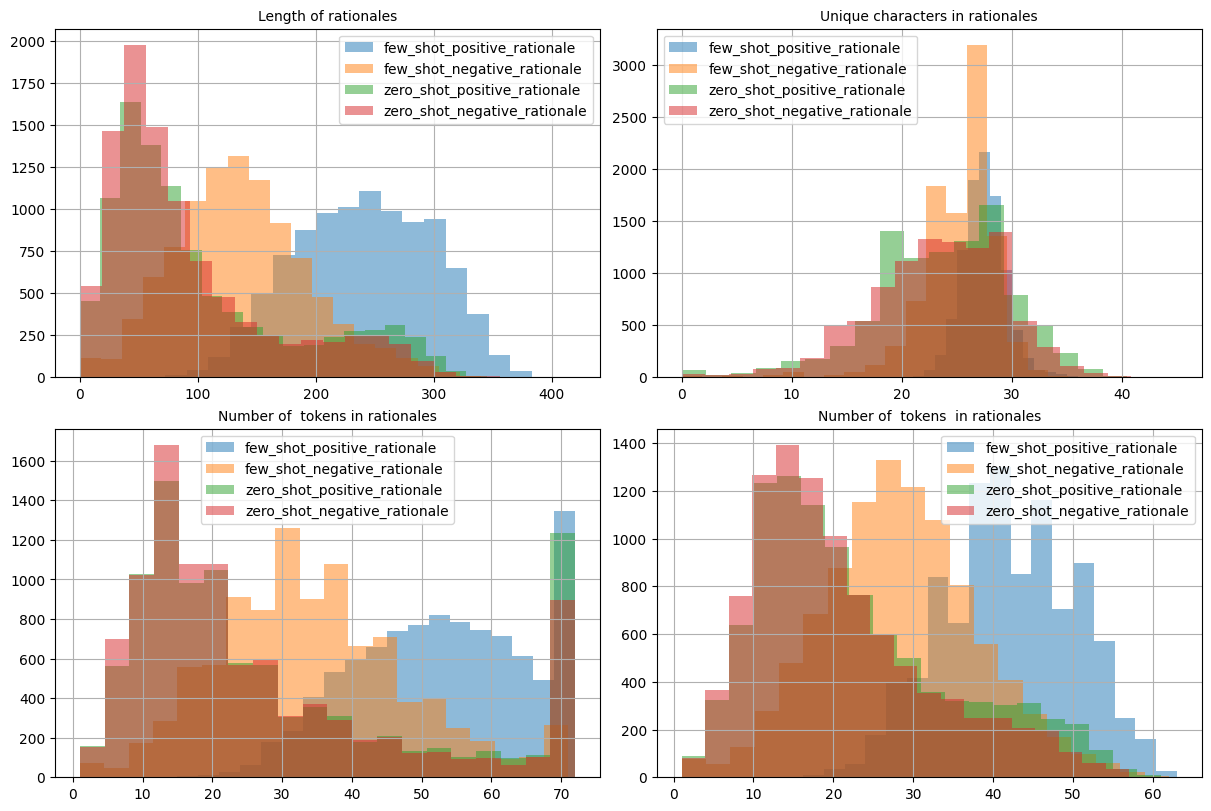

In [6]:
visualize_data(df, ['few_shot_positive_rationale', 'few_shot_negative_rationale', 'zero_shot_positive_rationale', 'zero_shot_negative_rationale'])

In [1]:
from datasets import concatenate_datasets, load_from_disk

def read_sharded_dataset(path, num_shards=10):
    return concatenate_datasets([
        load_from_disk(f"{path}/shard_{shard_idx}")
        for shard_idx in range(num_shards)
    ])


train_dataset = read_sharded_dataset(
    path="/home/stud03/DanielH/llm_outputs/rationales/cqa-train",
    num_shards=10
)

test_dataset = read_sharded_dataset(
    path="/home/stud03/DanielH/llm_outputs/rationales/cqa-test",
    num_shards=10
)

In [3]:
train_dataset

Dataset({
    features: ['id', 'question', 'choices', 'answer', 'abstractive_explanation', 'extractive_explanation', 'few_shot_positive_prompt', 'few_shot_negative_prompt', 'zero_shot_positive_prompt', 'zero_shot_negative_prompt', 'few_shot_positive_rationale', 'few_shot_negative_rationale', 'zero_shot_positive_rationale', 'zero_shot_negative_rationale'],
    num_rows: 9741
})

In [2]:
test_dataset

Dataset({
    features: ['id', 'question', 'choices', 'answer', 'abstractive_explanation', 'extractive_explanation', 'few_shot_positive_prompt', 'few_shot_negative_prompt', 'few_shot_positive_rationale', 'few_shot_negative_rationale'],
    num_rows: 1221
})

In [4]:
train_ids = set(train_dataset['id'])
test_ids = set(test_dataset['id'])

In [5]:
intersection = train_ids.intersection(test_ids)

In [6]:
len(intersection)

0